# TASEPy benchmarks

In [1]:
from TASEPy import psa_compute
from TASEPy import local_density
from TASEPy import mean_density
from TASEPy import current

import csv
from tabulate import tabulate

## Benchmark 1: comparison with exact results

Exact results were obtained by solving the stationary master equation $MP=0$ \[Eq. (5) in the main text\], where $M$ is the stochastic transition matrix, and $P$ is the probability vector. This system of equations was solved exactly using Mathematica (*exact/exact-small-system.nb*) for the system size $L=4$, and for three particles sizes $\ell=1,2$ and $3$. The initiation rate $\alpha$ was kept as a variable, and the results were expanded in Taylor series around $\alpha=0$ up to the order $K=5$.

The hopping rates for all three particle sizes are stored in file:
- *rates_L4.csv*. 

The local density coefficients are stored in files:
- *exact/rho-coeff_L4_ll1.csv* for $\ell=1$, 
- *exact/rho-coeff_L4_ll2.csv* for $\ell=2$ and 
- *exact/rho-coeff_L4_ll3.csv* for $\ell=3$. 

The particle current coefficients are stored in files:
- *exact/current-coeff_L4_ll1.csv* for $\ell=1$, 
- *exact/current-coeff_L4_ll2.csv* for $\ell=2$ and 
- *exact/current-coeff_L4_ll3.csv* for $\ell=3$.

### Example 1: L = 4 and $\ell$ = 1

In [2]:
# imports hopping rates (example L=4 and ll=1)

file = open('exact/rates_L4.csv','r')
reader=csv.reader(file)

rates = []
for lines in reader:
    rates.append(float(lines[0]))
file.close()

# imports exact local density coefficients (example L=4 and ll=1) 

file = open('exact/rho-coeff_L4_ll1.csv','r')
reader=csv.reader(file)

rhocoeff1 = []
for lines in reader:
    rhocoeff1.append([float(x) for x in lines])
file.close()

# imports exact particle current coefficients (example L=4 and ll=1)

file = open('exact/current-coeff_L4_ll1.csv','r')
reader=csv.reader(file)

Jcoeff1 = []
for row in reader:
    Jcoeff1.append([float(x) for x in row])
file.close()
Jcoeff1 = Jcoeff1[0]

print('Maximum order of the PSA: K =',len(rhocoeff1[0])-1)
print('Hopping rates are',rates)

Maximum order of the PSA: K = 5
Hopping rates are [1.88, 1.52, 1.09, 1.38]


In [3]:
# computes the PSA for order K = 5

L = 4 # lattice size
ll = 1 # particle size
K = 5 # maximum PSA order

rhocoeff2, Jcoeff2 = psa_compute(rates, K, ll)

In [4]:
# compares the local density

headers = ['order ' + str(x) for x in range(K+1)]
headers.insert(0, 'site')

for site,coeff in zip(range(K+1),rhocoeff1):
    coeff.insert(0,site+1)
    
print('Exact results (local density):')
print(tabulate(rhocoeff1, headers = headers)) # exact results

for site,coeff in zip(range(K+1),rhocoeff2):
    coeff.insert(0,site+1)

print()
print('TASEPy results (local density):')
print(tabulate(rhocoeff2, headers = headers)) # TASEPy

Exact results (local density):
  site    order 0    order 1    order 2    order 3    order 4    order 5
------  ---------  ---------  ---------  ---------  ---------  ---------
     1          0   0.531915   0.149892   0.846462  -1.08538   -4.66958
     2          0   0.657895   0.564896   0.134411  -3.24941    1.19327
     3          0   0.917431   0.176094  -0.902102  -0.936768   0.818141
     4          0   0.724638  -0.385446  -0.108617  -0.613378   0.786505

TASEPy results (local density):
  site    order 0    order 1    order 2    order 3    order 4    order 5
------  ---------  ---------  ---------  ---------  ---------  ---------
     1          0   0.531915   0.149892   0.846462  -1.08538   -4.66958
     2          0   0.657895   0.564896   0.134411  -3.24941    1.19327
     3          0   0.917431   0.176094  -0.902102  -0.936768   0.818141
     4          0   0.724638  -0.385446  -0.108617  -0.613378   0.786505


In [5]:
x = [1,2,3]
y = x
print(y)

[1, 2, 3]


In [6]:
# compares the particle current

print('Exact results (current):')
print(tabulate([Jcoeff1], headers = ['order ' + str(x) for x in range(K+1)])) # exact results

print()
print('TASEPy results (current):')
print(tabulate([Jcoeff2], headers = ['order ' + str(x) for x in range(K+1)])) # TASEPy

Exact results (current):
  order 0    order 1    order 2    order 3    order 4    order 5
---------  ---------  ---------  ---------  ---------  ---------
        1  -0.531915  -0.149892  -0.846462    1.08538    4.66958

TASEPy results (current):
  order 0    order 1    order 2    order 3    order 4    order 5
---------  ---------  ---------  ---------  ---------  ---------
        1  -0.531915  -0.149892  -0.846462    1.08538    4.66958


### Example 2: L = 4 and $\ell = 2$

In [7]:
# imports hopping rates (example L=4 and ll=2)

file = open('exact/rates_L4.csv','r')
reader=csv.reader(file)

rates = []
for lines in reader:
    rates.append(float(lines[0]))
file.close()

# imports exact local density coefficients (example L=4 and ll=2) 

file = open('exact/rho-coeff_L4_ll2.csv','r')
reader=csv.reader(file)

rhocoeff1 = []
for lines in reader:
    rhocoeff1.append([float(x) for x in lines])
file.close()

# imports exact particle current coefficients (example L=4 and ll=2)

file = open('exact/current-coeff_L4_ll2.csv','r')
reader=csv.reader(file)

Jcoeff1 = []
for row in reader:
    Jcoeff1.append([float(x) for x in row])
file.close()
Jcoeff1 = Jcoeff1[0]

print('Maximum order of the PSA: K =',len(rhocoeff1[0])-1)
print('Hopping rates are',rates)

Maximum order of the PSA: K = 5
Hopping rates are [1.88, 1.52, 1.09, 1.38]


In [8]:
# computes the PSA for order K = 5

L = 4 # lattice size
ll = 2 # particle size
K = 5 # maximum PSA order

rhocoeff2, Jcoeff2 = psa_compute(rates, K, ll)

In [9]:
# compares the local density

headers = ['order ' + str(x) for x in range(K+1)]
headers.insert(0, 'site')

for site,coeff in zip(range(K+1),rhocoeff1):
    coeff.insert(0,site+1)

print('Exact results (local density):')
print(tabulate(rhocoeff1, headers = ['order ' + str(x) for x in range(K+1)])) # exact results

for site,coeff in zip(range(K+1),rhocoeff2):
    coeff.insert(0,site+1)

print()
print('TASEPy results (local density):')
print(tabulate(rhocoeff2, headers = ['order ' + str(x) for x in range(K+1)])) # TASEPy

Exact results (local density):
      order 0    order 1     order 2     order 3    order 4    order 5
--  ---------  ---------  ----------  ----------  ---------  ---------
 1          0   0.531915   0.208803   -1.83332      3.43302   -2.47067
 2          0   0.657895  -0.0965666  -1.73927      4.22138   -4.58057
 3          0   0.917431  -1.09157    -0.102969     3.27761   -7.02239
 4          0   0.724638  -0.862181   -0.0813304    2.58883   -5.54667

TASEPy results (local density):
      order 0    order 1     order 2     order 3    order 4    order 5
--  ---------  ---------  ----------  ----------  ---------  ---------
 1          0   0.531915   0.208803   -1.83332      3.43302   -2.47067
 2          0   0.657895  -0.0965666  -1.73927      4.22138   -4.58057
 3          0   0.917431  -1.09157    -0.102969     3.27761   -7.02239
 4          0   0.724638  -0.862181   -0.0813304    2.58883   -5.54667


In [10]:
# compares the particle current

print('Exact results (current):')
print(tabulate([Jcoeff1], headers = ['order ' + str(x) for x in range(K+1)])) # exact results

print()
print('TASEPy results (current):')
print(tabulate([Jcoeff2], headers = ['order ' + str(x) for x in range(K+1)])) # TASEPy

Exact results (current):
  order 0    order 1    order 2    order 3    order 4    order 5
---------  ---------  ---------  ---------  ---------  ---------
        1   -1.18981  -0.112236    3.57259   -7.65441    7.05124

TASEPy results (current):
  order 0    order 1    order 2    order 3    order 4    order 5
---------  ---------  ---------  ---------  ---------  ---------
        1   -1.18981  -0.112236    3.57259   -7.65441    7.05124


### Example 3: L = 4 and $\ell = 3$

In [11]:
# imports hopping rates (example L=4 and ll=3)

file = open('exact/rates_L4.csv','r')
reader=csv.reader(file)

rates = []
for lines in reader:
    rates.append(float(lines[0]))
file.close()

# imports exact local density coefficients (example L=4 and ll=3) 

file = open('exact/rho-coeff_L4_ll3.csv','r')
reader=csv.reader(file)

rhocoeff1 = []
for lines in reader:
    rhocoeff1.append([float(x) for x in lines])
file.close()

# imports exact particle current coefficients (example L=4 and ll=3)

file = open('exact/current-coeff_L4_ll3.csv','r')
reader=csv.reader(file)

Jcoeff1 = []
for row in reader:
    Jcoeff1.append([float(x) for x in row])
file.close()
Jcoeff1 = Jcoeff1[0]

print('Maximum order of the PSA: K =',len(rhocoeff1[0])-1)
print('Hopping rates are',rates)

Maximum order of the PSA: K = 5
Hopping rates are [1.88, 1.52, 1.09, 1.38]


In [12]:
# computes the PSA for order K = 5

L = 4 # lattice size
ll = 3 # particle size
K = 5 # maximum PSA order

rhocoeff2, Jcoeff2 = psa_compute(rates, K, ll)

In [13]:
# compares the local density

headers = ['order ' + str(x) for x in range(K+1)]
headers.insert(0, 'site')

for site,coeff in zip(range(K+1),rhocoeff1):
    coeff.insert(0,site+1)

print('Exact results (local density):')
print(tabulate(rhocoeff1, headers = ['order ' + str(x) for x in range(K+1)])) # exact results

for site,coeff in zip(range(K+1),rhocoeff2):
    coeff.insert(0,site+1)

print()
print('TASEPy results (local density):')
print(tabulate(rhocoeff2, headers = ['order ' + str(x) for x in range(K+1)])) # TASEPy

Exact results (local density):
      order 0    order 1    order 2    order 3    order 4     order 5
--  ---------  ---------  ---------  ---------  ---------  ----------
 1          0   0.531915  -0.595773   0.595622  -0.464151   0.0921524
 2          0   0.657895  -1.38634    2.5759    -4.44973    7.31514
 3          0   0.917431  -1.93325    3.59208   -6.20513   10.2009
 4          0   0.724638  -1.52699    2.83722   -4.90116    8.05726

TASEPy results (local density):
      order 0    order 1    order 2    order 3    order 4     order 5
--  ---------  ---------  ---------  ---------  ---------  ----------
 1          0   0.531915  -0.595773   0.595622  -0.464151   0.0921524
 2          0   0.657895  -1.38634    2.5759    -4.44973    7.31514
 3          0   0.917431  -1.93325    3.59208   -6.20513   10.2009
 4          0   0.724638  -1.52699    2.83722   -4.90116    8.05726


In [14]:
# compares the particle current

print('Exact results (current):')
print(tabulate([Jcoeff1], headers = ['order ' + str(x) for x in range(K+1)])) # exact results

print()
print('TASEPy results (current):')
print(tabulate([Jcoeff2], headers = ['order ' + str(x) for x in range(K+1)])) # TASEPy

Exact results (current):
  order 0    order 1    order 2    order 3    order 4    order 5
---------  ---------  ---------  ---------  ---------  ---------
        1   -2.10724    3.91536    -6.7636     11.119   -17.6082

TASEPy results (current):
  order 0    order 1    order 2    order 3    order 4    order 5
---------  ---------  ---------  ---------  ---------  ---------
        1   -2.10724    3.91536    -6.7636     11.119   -17.6082


## Benchmark 2: comparison with simulations

For large systems, solving the master equation explicitely is not feasible, and one has to use stochastic simulations. We have simulated the inhomogeneous TASEP for using the code written in Fortran. The Fortran source code, *simulations/dTASEPe.f90*, was compiled using the following commands:

```
$ gfortan -c mt19937.f90
$ gfortran dTASEPe.f90 -o dTASEPe mt19937.o
```

The first command creates a module for the Mersenne Twister pseaudorandom number generator, whereas the second command compiles the dTASEPe program. The input file for *dTASEPe.f90* is *dTASEPe.dat* which contains the following parameters, one in each line:
- particle size $\ell$
- initiation rate $\alpha$
- number of iterations of the Gillespie algorithm $N_{\text{iter}}$ in multiples of the system size $L$
- filename where the hopping rates $\omega_1,\dots,\omega_L$ are stored
- filename for storing local density
- filename for storing particle current
- filename for storing computation time

The results were obtained for $L=50$, $\ell=1$ and $5$, $\alpha = 0.2$, and $N_{\text{iter}}=10^6$.

The hopping rates for both particle sizes are stored in file
- *simulations/rates_L50.dat*. 

The local density profiles are stored in files 
- *simulations/rho_a02_L50_ll1_iter1e6.dat* for $\ell=1$ and
- *simulations/rho_a02_L50_ll5_iter1e6.dat* for $\ell=5$. 

The particle current (for each lattice site including current into the lattice) is stored in files:
- *simulations/current_a02_L50_ll1_iter1e6.dat* for $\ell=1$ and
- *simulations/current_a02_L50_ll5_iter1e6.dat* for $\ell=5$.

These results were compared to the ones obtained by TASEPy up to $K=3$ for $\ell=1$ and up to $K=4$ for $\ell=5$.

### Example 1: L = 50, $\ell = 1$ and $K=3$

In [15]:
# imports hopping rates (example L=50 and ll=1)

file = open('simulations/rates_L50.dat','r')
reader=csv.reader(file)

rates = []
for lines in reader:
    rates.append(float(lines[0]))
file.close()

# imports simulated density profile (example L=50 and ll=1)

file = open('simulations/rho_a02_L50_ll1_iter1e6.dat','r')
reader=csv.reader(file)

profile_simulations = []
for lines in reader:
    profile_simulations.append(float(lines[0]))
file.close()

# imports simulated current and average (example L=50 and ll=1)

file = open('simulations/current_a02_L50_ll1_iter1e6.dat','r')
reader=csv.reader(file)

currents_sim = []
for lines in reader:
    currents_sim.append(float(lines[0]))
file.close()

J_simulations = sum(currents_sim)/len(currents_sim)

In [16]:
# computes the PSA for order K = 3

L = len(rates) # lattice size
ll = 1 # particle size
K = 3 # maximum PSA order

rhocoeff, Jcoeff = psa_compute(rates, K, ll)

In [17]:
# initiation rate

alpha = 0.2

In [18]:
# computes local density profiles

profile_TASEPy = local_density(rhocoeff, alpha)

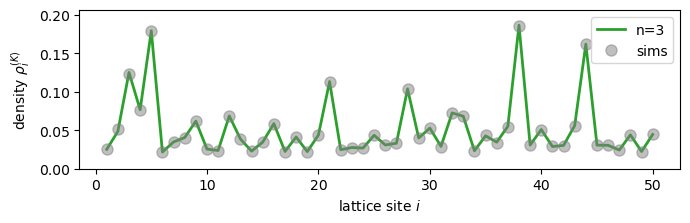

In [19]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

maxrho = max([max(x) for x in profile_TASEPy]) # maximum density need to set the y-axis range

plt.figure(figsize=(7,7/3))

sites = [x+1 for x in range(L)]

plt.plot(sites, profile_TASEPy[-1], linewidth=2, label='n='+str(K) , color='C{}'.format(K-1), linestyle='-')
plt.plot(sites, profile_simulations, 'o', label='sims' , color='gray', ms = 8, alpha=0.5)

plt.ylim(0,1.1*maxrho)

plt.xlabel(r'lattice site $i$', fontsize=10)
plt.ylabel(r'density $\rho_{i}^{(K)}$', fontsize=10)

# Set the title
#plt.title(r'Density profile, $\alpha = $'+str(alpha), fontsize=12)

plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

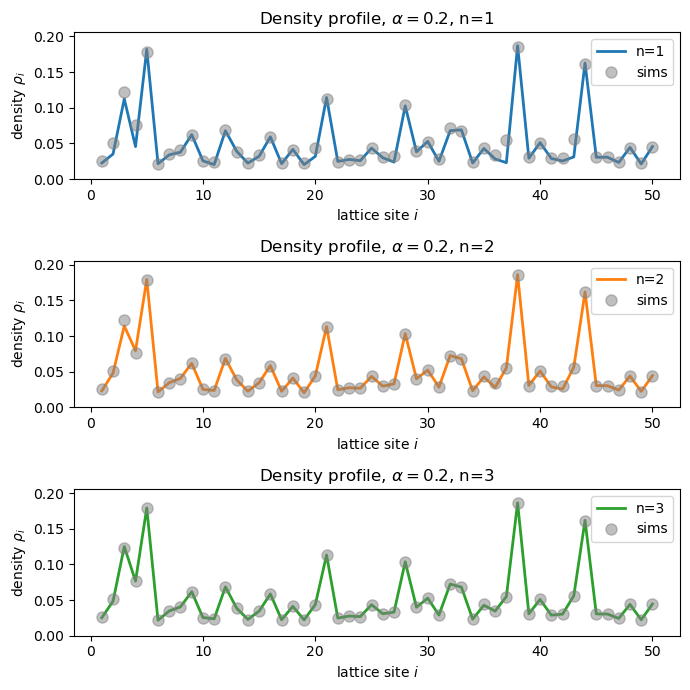

In [20]:
n_values = range(1,K+1)

maxrho = max([max(x) for x in profile_TASEPy]) # maximum density need to set the y-axis range

# Create a figure with K subplots, arranged in K rows and 1 columns
fig, axs = plt.subplots(K, 1, figsize=(7,K*7/3), sharex=False, sharey=True)

sites = [x + 1 for x in range(L)]

for i, n in enumerate(n_values):
    ax = axs[i]  # Select the current subplot
    
    ax.plot(sites, profile_TASEPy[n], linewidth=2, label=f'n={n}', color='C{}'.format(i), linestyle='-')   
    ax.plot(sites, profile_simulations, 'o', label='sims' , color='gray', ms = 8, alpha=0.5)
    
    ax.set_ylim(0,1.1*maxrho)

    ax.set_xlabel(r'lattice site $i$', fontsize=10)
    ax.set_ylabel(r'density $\rho_i$', fontsize=10)
    ax.set_title(r'Density profile, $\alpha = $' + str(alpha) + f', n={n}', fontsize=12)
    
    ax.legend(loc='upper right')

# Adjust the space between subplots to prevent labels from overlapping
plt.tight_layout()

plt.show()

In [21]:
J_TASEPy = current(Jcoeff, alpha)

print('J TASEPy = ', J_TASEPy)
print('J simulations = ', J_simulations)

per_err = [100*(j-J_simulations)/J_simulations for j in J_TASEPy]
headers = ['order ' + str(x) for x in range(K+1)]

print()
print('TASEPy results (% error of the current):')
print(tabulate([per_err], headers = headers))

J TASEPy =  [0.2, 0.19550056242969632, 0.1953555575128311, 0.1949659459731425]
J simulations =  0.19483457053285302

TASEPy results (current):
  order 0    order 1    order 2    order 3
---------  ---------  ---------  ---------
  2.65119   0.341824     0.2674  0.0674292


### Example 2: L = 50, $\ell = 5$ and $K=4$

In [22]:
# imports hopping rates (example L=50 and ll=5)

file = open('simulations/rates_L50.dat','r')
reader=csv.reader(file)

rates = []
for lines in reader:
    rates.append(float(lines[0]))
file.close()

# imports simulated density profile (example L=50 and ll=5)

file = open('simulations/rho_a02_L50_ll5_iter1e6.dat','r')
reader=csv.reader(file)

profile_simulations = []
for lines in reader:
    profile_simulations.append(float(lines[0]))
file.close()

# imports simulated current and average (example L=50 and ll=5)

file = open('simulations/current_a02_L50_ll5_iter1e6.dat','r')
reader=csv.reader(file)

currents_sim = []
for lines in reader:
    currents_sim.append(float(lines[0]))
file.close()

J_simulations = sum(currents_sim)/len(currents_sim)

In [23]:
# computes the PSA for order K = 4

L = len(rates) # lattice size
ll = 5 # particle size
K = 4 # maximum PSA order

rhocoeff, Jcoeff = psa_compute(rates, K, ll)

In [24]:
# initiation rate

alpha = 0.2

In [25]:
# computes local density profiles

profile_TASEPy = local_density(rhocoeff, alpha)

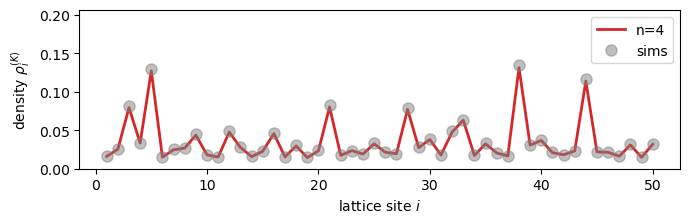

In [26]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

maxrho = max([max(x) for x in profile_TASEPy]) # maximum density need to set the y-axis range

plt.figure(figsize=(7,7/3))

sites = [x + 1 for x in range(L)]

plt.plot(sites, profile_TASEPy[-1], linewidth=2, label='n='+str(K) , color='C{}'.format(K-1), linestyle='-')
plt.plot(sites, profile_simulations, 'o', label='sims' , color='gray', ms = 8, alpha=0.5)

plt.ylim(0,1.1*maxrho)

plt.xlabel(r'lattice site $i$', fontsize=10)
plt.ylabel(r'density $\rho_{i}^{(K)}$', fontsize=10)

# Set the title
#plt.title(r'Density profile, $\alpha = $'+str(alpha), fontsize=12)

plt.legend(loc='upper right')
plt.tight_layout()

#plt.savefig('figure_benchmark1.pdf', dpi=300)

plt.show()

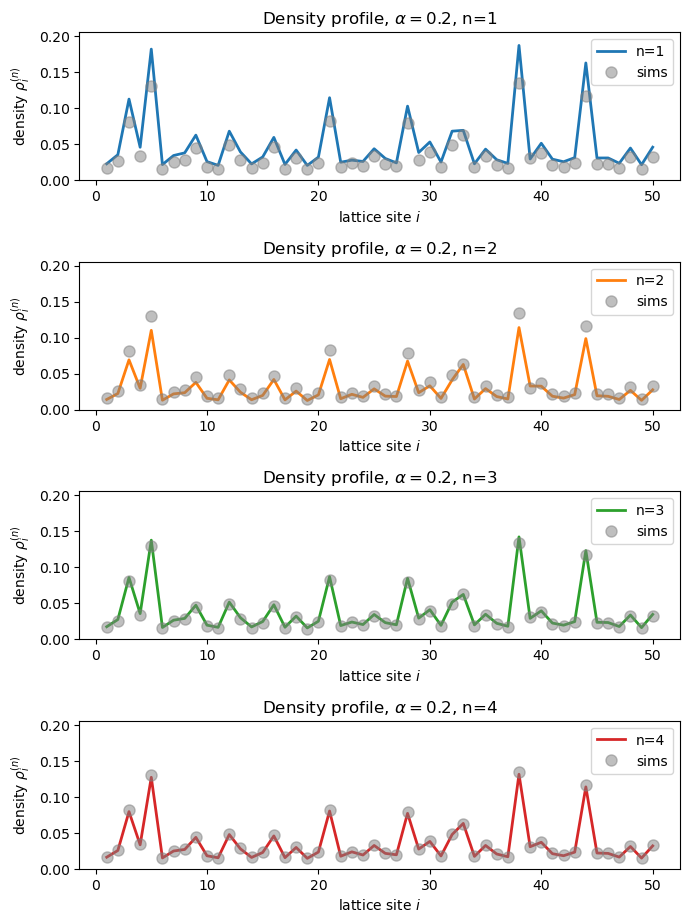

In [27]:
n_values = range(1,K+1)

maxrho = max([max(x) for x in profile_TASEPy]) # maximum density need to set the y-axis range

# Create a figure with K subplots, arranged in K rows and 1 columns
fig, axs = plt.subplots(K, 1, figsize=(7, K*(7/3)), sharex=False, sharey=True)

sites = [x + 1 for x in range(L)]

for i, n in enumerate(n_values):
    ax = axs[i]  # Select the current subplot
    
    ax.plot(sites, profile_TASEPy[n], linewidth=2, label=f'n={n}', color='C{}'.format(i), linestyle='-')  
    ax.plot(sites, profile_simulations, 'o', label='sims' , color='gray', ms = 8, alpha=0.5)
    
    ax.set_ylim(0,1.1*maxrho)

    ax.set_xlabel(r'lattice site $i$', fontsize=10)
    ax.set_ylabel(r'density $\rho_{i}^{(n)}$', fontsize=10)
    ax.set_title(r'Density profile, $\alpha = $' + str(alpha) + f', n={n}', fontsize=12)
    
    ax.legend(loc='upper right')

# Adjust the space between subplots to prevent labels from overlapping
plt.tight_layout()

plt.show()

In [28]:
J_TASEPy = current(Jcoeff, alpha)

print('J TASEPy = ', J_TASEPy)
print('J simulations = ', J_simulations)

per_err = [100*(j-J_simulations)/J_simulations for j in J_TASEPy]
headers = ['order ' + str(x) for x in range(K+1)]

print()
print('TASEPy results (% error of the current):')
print(tabulate([per_err], headers = headers))

J TASEPy =  [0.2, 0.12055656300314212, 0.15098896261086323, 0.139363115500763, 0.14380788008156592]
J simulations =  0.14261978443738338

TASEPy results (% error of the current):
  order 0    order 1    order 2    order 3    order 4
---------  ---------  ---------  ---------  ---------
   40.233     -15.47    5.86817   -2.28346   0.833051
